In [20]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from tensorflow.keras import utils

In [21]:
#!pip install keras

In [22]:
PATHDATA_MFFC_AVG = '../../../data/mfccs_cvs/audios_MFCC_average_15000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [23]:
FOLDS = 10
TRAIN_SIZE = 0.8

In [24]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y = np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (161602, 20)




In [25]:
def splitDataSet(X,Y,groups,tracks,test_size):              
        gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=0)
        gss.get_n_splits()
        returns = []
        for train_index, test_index in gss.split(X, Y, groups=groups):
            X_train_original, X_test_original = X[train_index], X[test_index]
            #print(X_train, X_test)
            Y_train__original, Y_test_original = Y[train_index], Y[test_index]
            #print(y_train, y_test)
            groups_original = groups[train_index]
            groups_test_original=groups[test_index]
            tracks_train_original = tracks[train_index]
            tracks_test_original = tracks[test_index]              
            returns.append(X_train_original)
            returns.append(Y_train__original)
            returns.append(X_test_original)
            returns.append(Y_test_original)
            returns.append(tracks_train_original)
            returns.append(tracks_test_original)
            returns.append(groups_original)
            returns.append(groups_test_original)    
              
        return returns

In [26]:
data_train = splitDataSet(X=X,Y=Y,groups=groups,tracks=tracks,test_size=1-TRAIN_SIZE)

In [27]:
X_train_original = data_train[0]
Y_train__original=data_train[1]
X_test_original=data_train[2]
Y_test_original=data_train[3]
tracks_train_original=data_train[4]
tracks_test_original=data_train[5]
groups_original=data_train[6]
groups_test_original=data_train[7]

In [28]:
X_train_original.shape

(127740, 20)

In [29]:
Y_test_original.shape

(33862, 1)

In [30]:
y_trainOHE = utils.to_categorical(Y_train__original)

In [31]:
y_trainOHE

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [32]:
y_trainOHE.shape

(127740, 5)

In [33]:
input_dim = X_train_original.shape[1]

In [34]:
input_dim

20

In [35]:
nb_classes = y_trainOHE.shape[1]
nb_classes

5

## Define the network architecture using keras

In [36]:
model = Sequential()
model.add(Dense(34, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(34))
model.add(Activation('relu'))
model.add(Dense(34))
model.add(Activation('relu'))
model.add(Dense(nb_classes, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 34)                714       
_________________________________________________________________
activation_3 (Activation)    (None, 34)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 34)                1190      
_________________________________________________________________
activation_4 (Activation)    (None, 34)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 34)                1190      
_________________________________________________________________
activation_5 (Activation)    (None, 34)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

# loss function and optimizer

In [122]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training

In [130]:
print("Training...")
model.fit(X_train_original, y_trainOHE, epochs=50, batch_size=128, validation_split=0.1, verbose=2)

Training...
Train on 114966 samples, validate on 12774 samples
Epoch 1/50
114966/114966 - 2s - loss: 1.2850 - acc: 0.4386 - val_loss: 1.9203 - val_acc: 0.1797
Epoch 2/50
114966/114966 - 2s - loss: 1.2845 - acc: 0.4399 - val_loss: 1.8614 - val_acc: 0.1957
Epoch 3/50
114966/114966 - 2s - loss: 1.2839 - acc: 0.4404 - val_loss: 1.9352 - val_acc: 0.1635
Epoch 4/50
114966/114966 - 2s - loss: 1.2831 - acc: 0.4400 - val_loss: 1.9758 - val_acc: 0.1614
Epoch 5/50
114966/114966 - 2s - loss: 1.2825 - acc: 0.4395 - val_loss: 1.9294 - val_acc: 0.1982
Epoch 6/50
114966/114966 - 2s - loss: 1.2829 - acc: 0.4400 - val_loss: 1.8929 - val_acc: 0.1837
Epoch 7/50
114966/114966 - 2s - loss: 1.2811 - acc: 0.4423 - val_loss: 1.7993 - val_acc: 0.2097
Epoch 8/50
114966/114966 - 2s - loss: 1.2815 - acc: 0.4394 - val_loss: 1.8605 - val_acc: 0.2015
Epoch 9/50
114966/114966 - 2s - loss: 1.2810 - acc: 0.4418 - val_loss: 1.8685 - val_acc: 0.2015
Epoch 10/50
114966/114966 - 2s - loss: 1.2799 - acc: 0.4418 - val_loss: 2

## Predict

In [131]:
def modelPredict(model,Xtest,tracks_test):
        Yest = model.predict(Xtest)  # probabilidades (Xtest.shape, n_clases)   
        #Creamos un matriz con la primera fila las predicciones y la otra el track 
        Yest = np.argmax(Yest, axis=1) # sacamos el index de la mayor porbabilidad 
        
        X_test_with_id_trak = np.column_stack((Yest,tracks_test))

        #Agrupamos por audio
        prediction_by_instances = npi.group_by(X_test_with_id_trak[:, -1]).split(X_test_with_id_trak[:, -2])

        #Sacamos la moda de prediccion
        predictions = []

        for v in range(len(prediction_by_instances)):
            decision = stats.mode(prediction_by_instances[v])[0]
            predictions.append(decision)
    
        return np.array(predictions) 

In [137]:
def createGroups(Y,tracks):
        Y_train_tracks = np.column_stack((Y,tracks))
        groups_by_tracks = npi.group_by(Y_train_tracks[:, -1]).split(Y_train_tracks[:, -2])
        modas = []

        for v in range(len(groups_by_tracks)):
            moda = stats.mode(groups_by_tracks[v])[0]
            modas.append(moda)
        return np.array(modas)

In [133]:
print("Generating test predictions...")
preds = modelPredict(model,X_test_original,tracks_test_original)

Generating test predictions...


In [135]:
preds.shape

(3145, 1)

In [139]:
Y_real = createGroups(Y_test_original,tracks_test_original)

In [140]:
Y_real.shape

(3145, 1)

In [141]:
Accuracy = np.mean(preds == Y_real)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  44.96025437201908 %


In [143]:
objects = ('yes','no','right','five','nine')

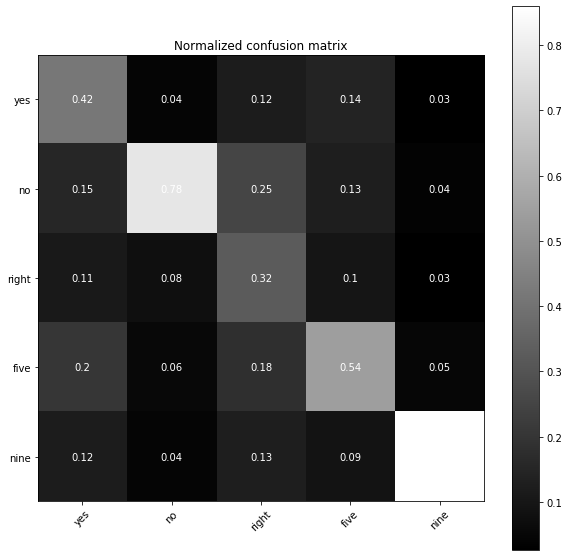

In [148]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_real, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.gray
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);